# Exploratory Data Analysis

## Pre-class Assignment 2 - Analysis of housing information

### [Problem 1] Obtaining a dataset

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('train.csv')

### [Problem 2] Investigating the dataset itself

The dataset includes 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.
- train.csv - the training set (We are only using this set for the assignment, the others can be used for the competition on Kaggle).
- test.csv - the test set
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### [Problem 3] Checking the data

The first 5 rows in the dataset.

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Information of each attribute in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

`SalePrice` is the target column (specified on Kaggle page).

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df['SalePrice'].describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### [Problem 4] Dealing with missing values

Check for missing values for each feature.

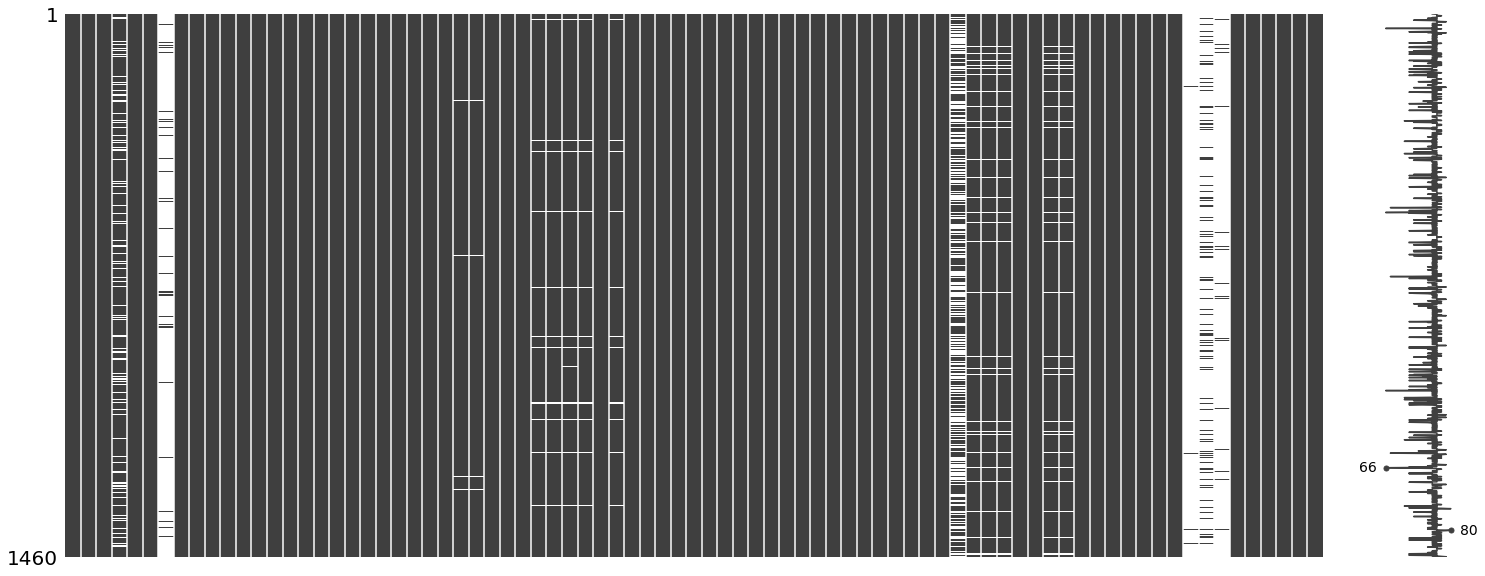

In [17]:
import missingno as msno
%matplotlib inline
msno.matrix(df);

Check the percentage of missing values.

In [20]:
miss_values = df.isnull().mean() * 100
print(miss_values)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


Delete features (columns) that have 5 or more missing values.

In [29]:
df = df.drop(columns=df.columns[df.isnull().sum() >= 5])
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


### [Problem 5] Researching terminology

**[kurtosis](https://en.wikipedia.org/wiki/Kurtosis)** : a measure of the "tailedness" of the probability distribution of a real-valued random variable. The standard normal distribution has a kurtosis of zero. In addition, with the second definition positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

**[skewness](https://en.wikipedia.org/wiki/Skewness)** : a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.

### [Problem 6] Confirming distribution

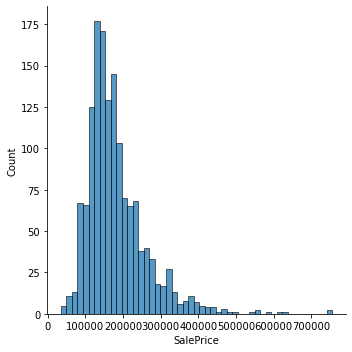

In [33]:
sns.displot(df['SalePrice']);

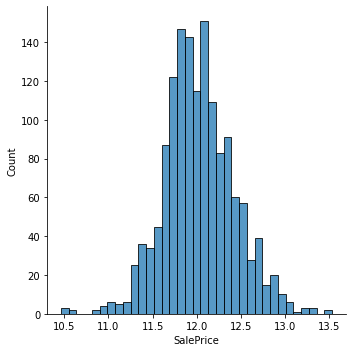

In [37]:
sns.displot(np.log(df['SalePrice']));

In [43]:
print("Kurtosis value:\nBefore log: ", df['SalePrice'].kurt(), "\nAfter log: ", np.log(df['SalePrice']).kurt())
print("\n")
print("Skewness value:\nBefore log: ", df['SalePrice'].skew(), "\nAfter log: ", np.log(df['SalePrice']).skew())

Kurtosis value:
Before log:  6.536281860064529 
After log:  0.8095319958036296


Skewness value:
Before log:  1.8828757597682129 
After log:  0.12133506220520406


The value distribution after logarithmetic transformation get closer to the normal distribution comparing to the one that does not take transformation. The conclusion can be expressed by kurtosis and skewness value (from the definition, the kurtosis and skewness value equals 0 represents a normal distribution).

### [Problem 7] Confirming the correlation coefficient

In [45]:
corr = df.corr()
corr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


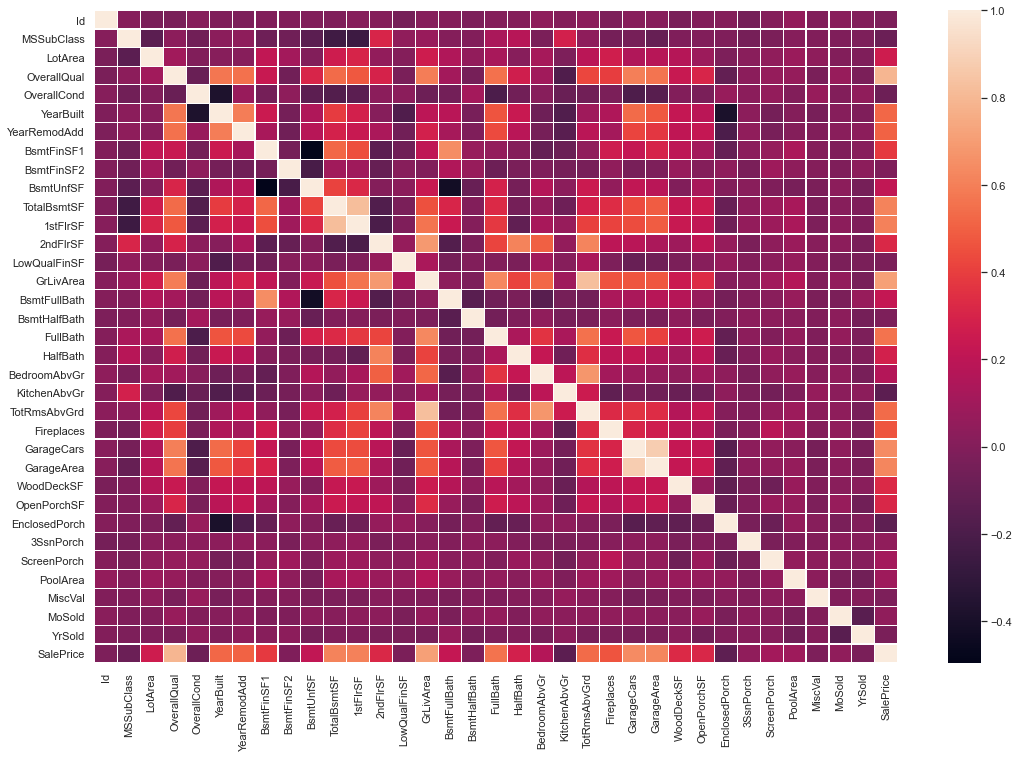

In [127]:
plt.subplots(figsize=(18, 12))
sns.heatmap(corr, linewidth=0.1)
plt.show()

In [79]:
#Get high correlation coefficient list (with value >= 0.6 only)
high_corr_dict = {}
for i in range(len(corr)):
    for j in range(i):
        if corr.iloc[i, j] >= 0.6:
            high_corr_dict[corr.columns[i] + ', ' + corr.index[j]] = corr.iloc[i, j]
high_corr_dict = dict(sorted(high_corr_dict.items(), key=lambda item: -item[1]))
pd.DataFrame(high_corr_dict, index=['correlation']).T

,correlation
"GarageArea, GarageCars",0.882475
"TotRmsAbvGrd, GrLivArea",0.825489
"1stFlrSF, TotalBsmtSF",0.819530
"SalePrice, OverallQual",0.790982
"SalePrice, GrLivArea",0.708624
"GrLivArea, 2ndFlrSF",0.687501
"TotRmsAbvGrd, BedroomAbvGr",0.676620
"BsmtFullBath, BsmtFinSF1",0.649212
"SalePrice, GarageCars",0.640409
"FullBath, GrLivArea",0.630012


['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.593007    0.600671    0.562022     0.537808   
GrLivArea        0.593007   1.000000    0.467247    0.468997     0.454868   
GarageCars       0.600671   0.467247    1.000000    0.882475     0.434585   
GarageArea       0.562022   0.468997    0.882475    1.000000     0.486665   
TotalBsmtSF      0.537808   0.454868    0.434585    0.486665     1.000000   
1stFlrSF         0.476224   0.566024    0.439317    0.489782     0.819530   
FullBath         0.550600   0.630012    0.469672    0.405656     0.323722   
TotRmsAbvGrd     0.427452   0.825489    0.362289    0.337822     0.285573   
YearBuilt        0.572323   0.199010    0.537850    0.478954     0.391452   
YearRemodAdd     0.550684   0.287389    0.420622    0.371600     0.291066   

           

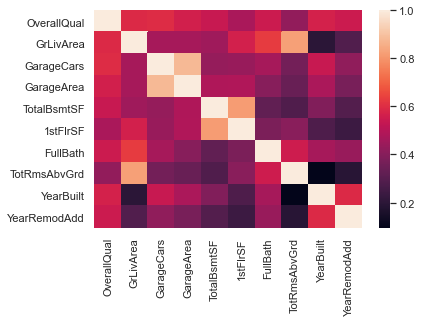

In [131]:
#Get 10 highest correlation with SalePrice
saleprice_cor = corr['SalePrice']
top10_corr = saleprice_cor.sort_values(axis=0, ascending=False)[1:11] #The first place is SalePrice - SalePrice (1.00) so we takes from the 2nd one
top10_lst = top10_corr.index.values.tolist()
print(top10_lst)

#Get the correlation matrix from 10 highest one
corr_top10 = corr[top10_lst].T[top10_lst]
print(corr_top10)

#Get the heatmap
sns.heatmap(corr_top10)
sns.set()

It can be seen that some of these features have high dependancy and all of them largely contribute to the target feature SalePrice. For example, the top 3 correlation coefficients are from:
- `GarageCars` and `GarageArea`
- First Floor square feet `1stFlrSF` and Total square feet of basement area `TotalBsmtSF`
- Total rooms above grade (does not include bathrooms) `TotRmsAbvGrd` and Above grade (ground) living area square feet `GrLivArea`

The top 3 can be gotten by the following code:

In [135]:
high_corr_dict = {}
for i in range(len(corr_top10)):
    for j in range(i):
        high_corr_dict[corr_top10.columns[i] + ', ' + corr_top10.index[j]] = corr_top10.iloc[i, j]
high_corr_dict = dict(sorted(high_corr_dict.items(), key=lambda item: -item[1]))
pd.DataFrame(high_corr_dict, index=['correlation']).T[:3]

,correlation
"GarageArea, GarageCars",0.882475
"TotRmsAbvGrd, GrLivArea",0.825489
"1stFlrSF, TotalBsmtSF",0.819530
